In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Load the dataset
file_path = '3026NMfixed_UT.csv'
df = pd.read_csv(file_path)

In [15]:
# Encode the 'ut' column
le_ut = LabelEncoder()
df['ut'] = le_ut.fit_transform(df['ut'])

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['utterance'], df['ut'], test_size=0.2, random_state=42)

In [17]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [18]:
# Initialize and train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_vec, y_train)

SVC()

In [19]:
# Predict on the test set
y_pred = svm_model.predict(X_test_vec)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.5221


In [21]:
# Ensure the labels parameter includes all possible classes seen during encoding
all_labels = np.unique(np.concatenate((y_test, y_pred)))
target_names = [str(label) for label in le_ut.inverse_transform(all_labels)]

In [22]:
# Ensure the labels parameter includes all possible classes seen during encoding
all_labels = np.unique(np.concatenate((y_test, y_pred)))
target_names = [str(label) for label in le_ut.inverse_transform(all_labels)]

In [23]:
# Print classification report
print(classification_report(y_test, y_pred, labels=all_labels, target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

           0       0.36      0.82      0.50        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        11
           6       0.71      0.83      0.77        24
           7       0.00      0.00      0.00         1
           9       0.49      0.88      0.63        32
          10       0.67      0.40      0.50         5
          11       0.00      0.00      0.00         1

    accuracy                           0.52       113
   macro avg       0.20      0.27      0.22       113
weighted avg       0.36      0.52      0.41       113



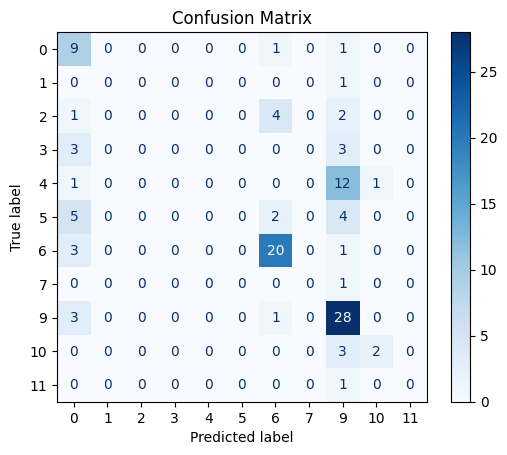

In [24]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_vec, y_test, display_labels=target_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()